In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os
import os
from natsort import os_sorted
from sklearn.linear_model import LinearRegression 
import gc

In [2]:
def bulk_do_dip_removal(folder_to_strip, start_at = 0):
    sorted_directory = os_sorted(os.listdir(folder_to_strip))
    for k in range(len(sorted_directory)-start_at):
    #for k in range(6):
        i = k+start_at
        path_to_image = folder_to_strip+'/'+sorted_directory[i]
        image = plt.imread(path_to_image)
        image[image<70/256] = 0
        #image[image>200/256] = 0
        points = np.nonzero(image)
        mean_x = np.mean(points[1])
        mean_y = np.mean(points[0])
        brightnesses = image[points]
        model = LinearRegression()
        independents = np.transpose(np.array(((points[0]-mean_y),(points[0]-mean_y)**2, (points[1]-mean_x), (points[1]-mean_x)**2)))
        dependents = brightnesses[::1]
        model.fit(independents, dependents)
        long_wavelength_params = np.append(model.coef_,model.intercept_)
        fixed_brightnesses = brightnesses-(long_wavelength_params[0]*(points[0]-mean_y) + long_wavelength_params[1]*((points[0]-mean_y)**2)+long_wavelength_params[2]*(points[1]-mean_x)+long_wavelength_params[3]*((points[1]-mean_x)**2))
        fixed_brightnesses = fixed_brightnesses-np.min(fixed_brightnesses)
        fixed_brightnesses = fixed_brightnesses*(1/np.max(fixed_brightnesses))
        image[points] = fixed_brightnesses
        image = image *((256*256)-1)
        image = image.astype(np.uint16)
        image = Image.fromarray(image)
        name, extension = sorted_directory[i].split('.')
        new_name = name+'_dipped.'+extension
        image.save(new_name)
        print(new_name)
        del image
        del points
        del brightnesses
        del fixed_brightnesses
        gc.collect()

In [4]:
def bulk_do_lwremoval(folder_to_strip, start_at = 0):
    sorted_directory = os_sorted(os.listdir(folder_to_strip))
    for k in range(len(sorted_directory)-start_at):
    #for i in range(2):
        i = k+start_at
        path_to_image = folder_to_strip+'/'+sorted_directory[i]
        image = plt.imread(path_to_image)
        image[image<80/256] = 0
        #image[image>200/256] = 0
        points = np.nonzero(image)
        mean_x = np.mean(points[1])
        mean_y = np.mean(points[0])
        brightnesses = image[points]
        model = LinearRegression()
        independents = np.transpose(np.array([points[0][::1],points[1][::1]]))
        dependents = brightnesses[::1]
        model.fit(independents, dependents)
        long_wavelength_params = np.append(model.coef_,model.intercept_)
        fixed_brightnesses = brightnesses-(long_wavelength_params[0]*(points[0]-mean_y)+long_wavelength_params[1]*(points[1]-mean_x))
        fixed_brightnesses = fixed_brightnesses-np.min(fixed_brightnesses)
        fixed_brightnesses = fixed_brightnesses*(1/np.max(fixed_brightnesses))
        image[points] = fixed_brightnesses
        image = image *((256*256)-1)
        image = image.astype(np.uint16)
        image = Image.fromarray(image)
        name, extension = sorted_directory[i].split('.')
        new_name = name+'_levelled.'+extension
        image.save(new_name)
        print(new_name)
        del image
        del points
        del brightnesses
        del fixed_brightnesses
        gc.collect()
        
        
                   
    

In [3]:
def bulk_do_threshold(folder_to_strip, lower_percentile, upper_percentile, start_at = 0, zero_threshold = 40):
    sorted_directory = os_sorted(os.listdir(folder_to_strip))
    for k in range(len(sorted_directory)-start_at):
    #for i in range(2):
        i = k+start_at
        path_to_image = folder_to_strip+'/'+sorted_directory[i]
        image = plt.imread(path_to_image)
        image[image<(zero_threshold/256)] = 0
        sorted_brightnesses = np.sort(image[np.nonzero(image)])
        lower_threshold = sorted_brightnesses[int(np.floor(lower_percentile*len(sorted_brightnesses)))]
        upper_threshold = sorted_brightnesses[int(np.ceil((1-upper_percentile)*len(sorted_brightnesses)))]
        image[image<lower_threshold] = lower_threshold
        image[image>upper_threshold] = upper_threshold
        image = (image-lower_threshold)*(0.999/(upper_threshold-lower_threshold))
        image = image *((256*256)-1)
        image = image.astype(np.uint16)
        image = Image.fromarray(image)
        name, extension = sorted_directory[i].split('.')
        new_name = name+'_thresh_'+str(int(100*lower_percentile))+'_'+str(int(100*upper_percentile))+'_'+str(int(np.round(lower_threshold*255)))+'_'+str(int(np.round(upper_threshold*255)))+'.'+extension
        image.save(new_name)
        print(new_name)
        del image
        del sorted_brightnesses
        gc.collect()
    

Below here is debugging/legacy/experimental

In [103]:
image = plt.imread("Initial/John2_geo.png")

In [71]:
#image_unmodified = plt.imread("arith_mean_fixed_rerun.png")

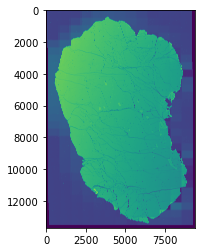

In [86]:
plt.imshow(image)

In [91]:
image[image<110/256] = 0


In [49]:
image[image>250/256] = 0

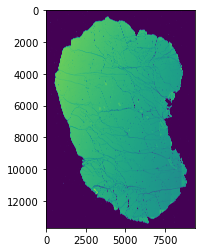

In [92]:
plt.imshow(image)

In [99]:
points = np.nonzero(image)

In [102]:
points[0]**2

array([      121,       121,       144, ..., 182790400, 182790400,
       182790400])

In [31]:
np.max(points[0])

8528

In [32]:
np.max(points[1])

12793

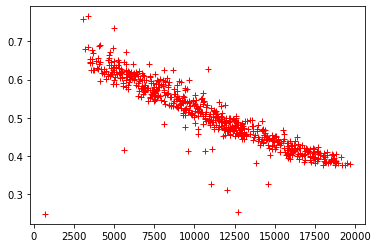

In [12]:
plt.plot(points[0][::100000]+points[1][::100000], brightnesses[::100000], 'r+')

In [18]:
brightnesses = image[points]

In [ ]:
image[1].shape

In [ ]:
image[points].shape

In [ ]:
image[brightnesses[1]]

In [20]:
multi_lin_predict = model.predict(independents)
#genetic_predict = mapping_func(anint_parameter_bundle)

print('mean_squared_error for multi lin: ', mean_squared_error(dependents, multi_lin_predict)) 

mean_squared_error for multi lin:  0.055898324025248344


In [21]:
long_wavelength_params = np.append(model.coef_,model.intercept_)

In [22]:
long_wavelength_params

array([ 2.72244489e-06, -8.97419931e-06,  3.62237009e-01])

In [23]:
mean_x = np.mean(points[1])

In [24]:
mean_x

6425.110525421426

In [25]:
mean_y = np.mean(points[0])

In [26]:
mean_y

4291.574061778102

In [21]:
np.mean(image_unmodified[points])

NameError: name 'image_unmodified' is not defined

In [22]:
brightness_at_mean = long_wavelength_params[2] +long_wavelength_params[0]*mean_y +long_wavelength_params[1]*mean_x

In [23]:
brightness_at_mean

0.5084205409226517

In [28]:
image[points] = fixed_brightnesses

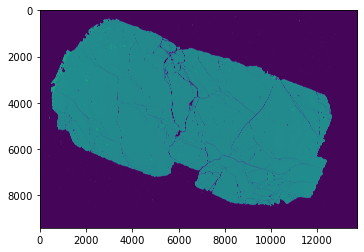

In [26]:
plt.imshow(image)

In [75]:
np.mean(image[points])

0.46306533

In [21]:
np.mean(image_unmodified)

NameError: name 'image_unmodified' is not defined

In [29]:
image_boosted = image *((256*256)-1)
to_save = image_boosted.astype(np.uint16)
print(np.max(to_save))
to_save = Image.fromarray(to_save)
to_save.save('John3_arith_25x_lwremoved.png')

65535


In [63]:
image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
colors = plt.get_cmap('plasma')

In [12]:
colors(0.0001)

(0.050383, 0.029803, 0.527975, 1.0)

In [35]:
plasma(fixed_brightnesses)

NameError: name 'plasma' is not defined

In [4]:
bulk_do_dip_removal('Initial', start_at = 0)

John3_butter_geo_dipped.png
John3_butter_geo_refined_dipped.png
John3_butter_off_dipped.png
John3_butter_off_refined_dipped.png


In [6]:
bulk_do_threshold('do_this_one', 0.01, 0.02, 0, 40)

John3_butter_improved_geo_thresh_1_2_128_137.png


In [18]:
unmodified = plt.imread('C:/Users/rwfbl/Stitched_crystals/Long_wavelength_removed/John5_geo_levelled.png')


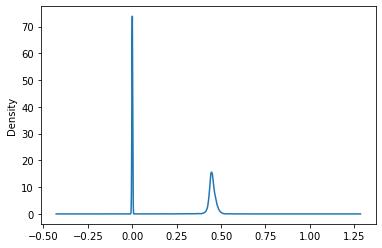

In [19]:
series = pd.Series(unmodified.flatten()[::10000])
ax = series.plot.kde(bw_method = 0.01)

In [15]:
0.3*256

76.8

In [32]:
unmodified[unmodified>0]

array([0.18434425, 0.1851835 , 0.19462882, ..., 0.20486763, 0.20090029,
       0.18263523], dtype=float32)

In [29]:
np.min(unmodified)

0.0

In [33]:
70/256

0.2734375

In [23]:
np.max(image)

0.7805777

In [24]:
image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

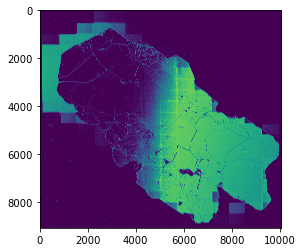

In [25]:
plt.imshow(image)